# load ‘data.mat’

In [86]:
import scipy.io 
import numpy as np
import matplotlib.pyplot as plt
mat = scipy.io.loadmat('data.mat') 
x = mat['x']
y = mat['y']

# 1.1. Plot the data using plot function. 

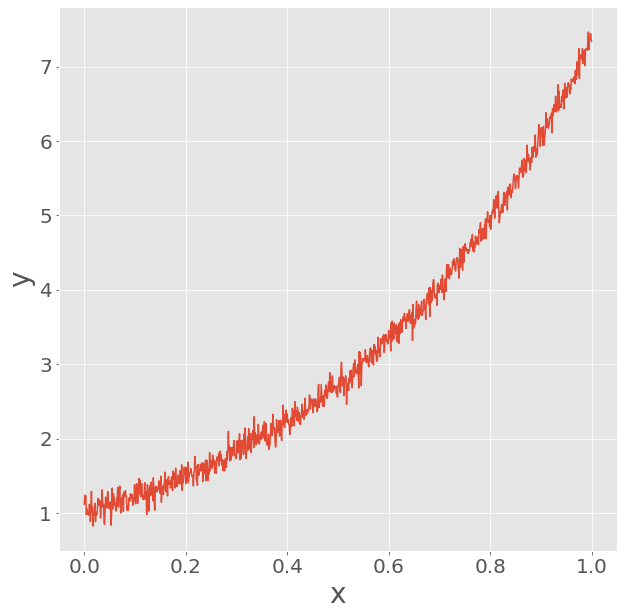

In [87]:
# 設置圖片大小
plt.gcf().set_size_inches(10, 10)
plt.plot(x, y)
plt.xlabel("x",fontsize=28)
plt.ylabel("y",fontsize=28)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

# 1.2. Compute the least square line $y = \theta_0 +x\theta_1$ using the given data and overlay the line over the given data.

### <font color=red>ANS. Using 線性回歸公式解: $\theta_0 = 0.207027, \theta_1 = 5.98091$; Using Moore-Penrose Pseudoinverse: $\theta_0 = 0.207027, \theta_1 = 5.98091$ </font>

## method1: 線性回歸公式解

In [88]:
line_theta1 = np.sum((x-x.mean())*(y-y.mean())) / (x.var()*1001)
line_theta0 = y.mean() - line_theta1*x.mean()
print(line_theta1, line_theta0)

5.98091716963754 0.20702719954940418


## method2: Moore-Penrose Pseudoinverse

In [89]:
from sklearn.preprocessing import PolynomialFeatures
X = PolynomialFeatures(degree=1).fit_transform(x) # generate polynomial term
line_theta0 = np.linalg.inv(X.transpose().dot(X)).dot(X.transpose().dot(y))[0]
line_theta1 = np.linalg.inv(X.transpose().dot(X)).dot(X.transpose().dot(y))[1]
print(line_theta1, line_theta0)

[5.98091717] [0.2070272]


# 2.1. compute the least square parabola (i.e. second order polynomial $y=\theta_0 + x\theta_1 + x^2\theta_2$) to fit the data.

### <font color=red>ANS. Using Moore-Penrose Pseudoinverse: $\theta_0 = 1.17894, \theta_1 = 0.14356, \theta_2 = 5.83735$; Using Gradient Descent: $\theta_0 = 1.17828, \theta_1 = 0.14726, \theta_2 = 5.83377$ </font>

In [90]:
from sklearn.preprocessing import PolynomialFeatures
X = PolynomialFeatures(degree=2, ).fit_transform(x) # generate second order polynomial

## method1: Moore-Penrose Pseudoinverse

In [91]:
parabola_theta0 = np.linalg.inv(X.transpose().dot(X)).dot(X.transpose().dot(y))[0]
parabola_theta1 = np.linalg.inv(X.transpose().dot(X)).dot(X.transpose().dot(y))[1]
parabola_theta2 = np.linalg.inv(X.transpose().dot(X)).dot(X.transpose().dot(y))[2]
print(parabola_theta0, parabola_theta1, parabola_theta2)

[1.17894599] [0.14356709] [5.83735008]


# method2: Gradient Descent

In [92]:
loss_records = []

def gradient(weight):
    theta0, theta1, theta2 = weight[0], weight[1], weight[2]
    loss = (y - theta0 - X[:,1].reshape(-1,1)*theta1 - X[:,2].reshape(-1,1)*theta2)**2 # loss
    loss_records.append(np.sum(np.abs(loss))) # loss records
    return X.transpose().dot(X).dot(weight) - X.transpose().dot(y)

def gradient_descent(gradient, start, learn_rate, n_iter=40000, tolerance=1e-06):
    weight = start
    for _ in range(n_iter):
        diff = -learn_rate * gradient(weight)
        if np.all(np.abs(diff) <= tolerance):
            break
        weight += diff
    return weight

# init_weight = np.concatenate((np.ones(1001).reshape(-1,1)*0.1,np.ones(1001).reshape(-1,1)*0.1,np.ones(1001).reshape(-1,1)*0.1),axis=1)
init_weight = np.array([[0.003], [0.0001], [0.002]])
final_weights = gradient_descent(gradient, init_weight, 1e-4)
l2_lose_theta0 = final_weights[0]
l2_lose_theta1 = final_weights[1]
l2_lose_theta2 = final_weights[2]
print(l2_lose_theta0, l2_lose_theta1, l2_lose_theta2)
# print(loss_records) # if want to see loss history

[1.17828425] [0.14726973] [5.83377777]


## 2.2. Explain which formulation (line or parabola) is more suitable for this dataset and why?

### <font color=red>ANS. parabola is much better, we can tell it by MSE score, and also by observe the following picture</font>  
### <font color=red>MSE of line: 0.20580, MSE of parabola: 0.01574</font>

In [93]:
line_y = X[:,0]*line_theta0 + X[:,1]*line_theta1
parabola_y =  X[:,0]*parabola_theta0 + X[:,1]*parabola_theta1 + X[:,2]*parabola_theta2
mse_line = ((y.reshape(-1) - line_y)**2).mean()
mse_parabola= ((y.reshape(-1) - parabola_y)**2).mean()
print(mse_line, mse_parabola)

0.20580596682517396 0.015744919931207565


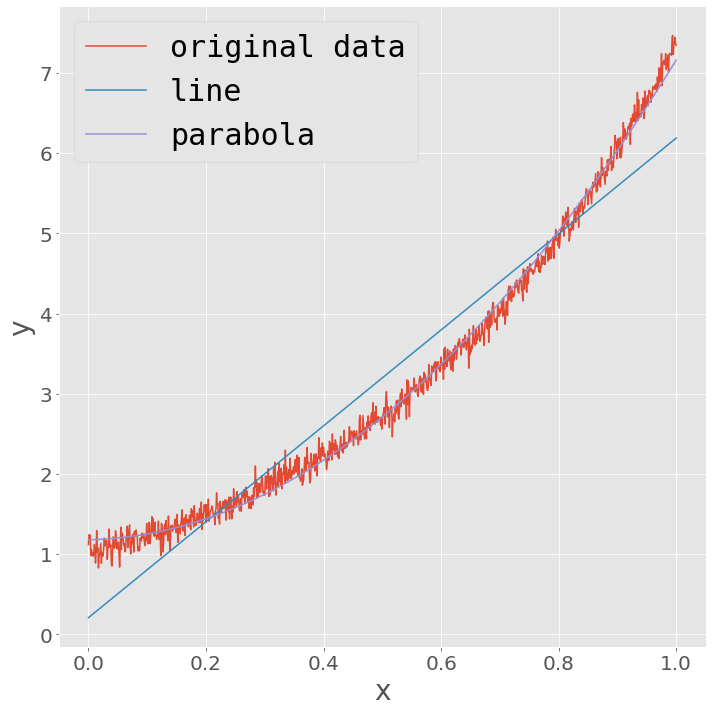

In [94]:
# 設置圖片大小
plt.gcf().set_size_inches(10, 10)

diagram_x = x
diagram_y = np.concatenate((y, line_theta0 + x*line_theta1, parabola_theta0 + x*parabola_theta1 + x**2*parabola_theta2),axis=1)
plt.plot(diagram_x, diagram_y)
plt.legend(('original data', 'line', 'parabola'), loc='best', framealpha=0.9, prop={'size': 30, 'family': 'monospace'})
plt.xlabel("x",fontsize=28)
plt.ylabel("y",fontsize=28)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
# 避免被圖表元素被蓋住
plt.tight_layout()
plt.show()

# 3. now we use the loss function (L1 Norm) instead of least square based methods. (paste your source code and show the results in your report). 
### <font color=red>ANS. $\theta_0 = 1.1862, \theta_1 = 0.14985, \theta_2 = 5.81618$ </font>

In [98]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
import scipy.io 
import numpy as np
import matplotlib.pyplot as plt

mat = scipy.io.loadmat('data.mat') 
x = mat['x']
y = mat['y']
X = PolynomialFeatures(degree=2, ).fit_transform(x) # generate second order polynomial
loss_records = []

def gradient(weight):
    theta0, theta1, theta2 = weight[0], weight[1], weight[2]
    loss_without_abs = y - theta0 - X[:,1].reshape(-1,1)*theta1 - X[:,2].reshape(-1,1)*theta2 # loss
    loss_records.append(np.sum(np.abs(loss_without_abs))) # loss records
    return -1*(X.transpose().dot(np.sign(loss_without_abs)))

def gradient_descent(gradient, start, learn_rate, n_iter=20000, tolerance=1e-06):
    weight = start
    for _ in range(n_iter):
        diff = -learn_rate * gradient(weight)
        if np.all(np.abs(diff) <= tolerance):
            break
        weight += diff
    return weight

# init_weight = np.concatenate((np.ones(1001).reshape(-1,1)*0.1,np.ones(1001).reshape(-1,1)*0.1,np.ones(1001).reshape(-1,1)*0.1),axis=1)
init_weight = np.array([[0.003], [0.0001], [0.002]])
final_weights = gradient_descent(gradient, init_weight, 1e-4)
l1_lose_theta0 = final_weights[0]
l1_lose_theta1 = final_weights[1]
l1_lose_theta2 = final_weights[2]
print(l1_lose_theta0, l1_lose_theta1, l1_lose_theta2)
# print(loss_records) # if want to see loss history

[1.1862] [0.1498584] [5.81618555]
